# Building Interactive Data Tools with Zillow Data

This notebook can be used as an effective start to build out interactive python tools to be used with Zillow Datasets!

We start by importing all necessary libraries and jupyter magics.

In [1]:
# This notebook is assuming you are running a Python 3 kernel!
%matplotlib inline
from IPython.display import display
from ipywidgets import interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import operator
import sys
import os
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2

We then provide a path to the necessary files. In this instance we are pointing to data that is [publicly available from Zillow](https://www.zillow.com/research/data/).

In [2]:
metro_median_all = 'data/Metro_MedianListingPrice_AllHomes.csv'
metro_median_sqft = 'data/Metro_MedianListingPricePerSqft_AllHomes.csv'
metro_zhvi = 'data/Metro_Zhvi_AllHomes.csv'

As the data stands currently, some of it's columns are not particularly useful and the format it is presented in will be harder to work with. We use the following to set the Region Name as the index, drop the SizeRank column (which isn't useful) and transform it make the transaction month the new independent variable for graphing purposes.

In [3]:
df_median_all = pd.read_csv(metro_median_all).set_index('RegionName').drop('SizeRank', 1).T

In [4]:
df_median_all.head()

RegionName  United States  New York, NY  Los Angeles, CA  Chicago, IL  \
2010-01               NaN           NaN              NaN          NaN   
2010-02               NaN           NaN              NaN          NaN   
2010-03               NaN           NaN              NaN          NaN   
2010-04               NaN           NaN              NaN          NaN   
2010-05               NaN           NaN              NaN          NaN   

RegionName  Dallas, TX  Philadelphia, PA  Houston, TX  Washington, DC  \
2010-01       164900.0               NaN     159000.0        279900.0   
2010-02       164900.0               NaN     159900.0        284900.0   
2010-03       165000.0               NaN     160000.0        289900.0   
2010-04       166000.0               NaN     160000.0        299000.0   
2010-05       165000.0               NaN     159900.0        289995.0   

RegionName  Miami, FL  Atlanta, GA    ...      Snyder, TX  Fairfield, IA  \
2010-01           NaN          NaN    ...             NaN            NaN   
2010-02           NaN          NaN    ...             NaN            NaN   
2010-03           NaN          NaN    ...             NaN            NaN   
2010-04           NaN          NaN    ...             NaN            NaN   
2010-05           NaN          NaN    ...             NaN            NaN   

RegionName  Spencer, IA  Milford, IA  Edgartown, MA  Winnemucca, NV  \
2010-01             NaN          NaN            NaN             NaN   
2010-02             NaN          NaN            NaN             NaN   
2010-03             NaN          NaN            NaN             NaN   
2010-04             NaN          NaN            NaN             NaN   
2010-05             NaN          NaN            NaN             NaN   

RegionName  Sweetwater, TX  Andrews, TX  Lamesa, TX  Craig, CO  
2010-01                NaN          NaN         NaN        NaN  
2010-02                NaN          NaN         NaN        NaN  
2010-03                NaN          NaN         NaN        NaN  
2010-04                NaN          NaN         NaN        NaN  
2010-05                NaN          NaN         NaN        NaN  

[5 rows x 875 columns]

Here we start building out what our plotting function will look like:

In [5]:
# Create a function that plots from a median data-set.
def median_plot(i):
    plot = df_median_all[i].plot()
    plt.show()

In [6]:
# Create a list of columns, this will act as the selected variable for plotting.
columns = []
for i in df_median_all.columns:
    columns.append(i)
columns.sort()

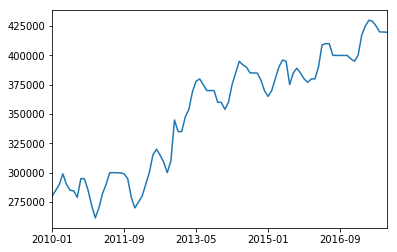

In [7]:
median_plot('Washington, DC');

We can now combine all of this together to create our interactive widget! Notice how when you run the whole notebook you can specify which major metropolitan center in the United states you're analyzing.

In [9]:
interactive_plot = interact_manual(median_plot, i=columns)

A Jupyter Widget